# Explore here

In [1]:
# Your code here

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv')

df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [3]:
df.drop_duplicates(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [5]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.factorize(df[column])[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(47)
memory usage: 2.6 MB


In [6]:
#variable objetivo Heart Disease_prevalence

X = df.drop(columns=['Heart disease_prevalence','Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI'])
y = df['Heart disease_prevalence']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
X_train.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1292,26127,26625,3221,12.097653,3463,13.006573,2922,10.974648,2829,10.625352,...,2314,13.7,12.6,14.9,2823,3.8,3.5,4.1,771,6
2302,42121,51266,5272,10.283619,5751,11.217961,5137,10.020286,5341,10.418211,...,4097,13.1,11.9,14.2,5416,3.5,3.2,3.8,1454,5
761,18133,37779,3915,10.362900,5118,13.547209,6202,16.416528,4363,11.548744,...,2792,12.2,11.2,13.1,3698,2.9,2.7,3.1,871,2
2194,40131,91984,11163,12.135806,12646,13.748043,11595,12.605453,11357,12.346712,...,5716,11.2,10.4,12.0,7913,3.0,2.8,3.2,2118,3
1241,26025,134487,16698,12.416070,17666,13.135842,17281,12.849569,15993,11.891856,...,10002,12.5,11.7,13.4,12987,3.4,3.2,3.6,3490,4


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train,y_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index) 

In [10]:
X_train_scaled.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1292,-0.301633,-0.229763,-0.225393,0.102383,-0.231350,0.162374,-0.229775,-0.429454,-0.223780,-0.665485,...,-0.222477,0.244361,0.209312,0.314479,-0.215940,0.644725,0.576430,0.657452,-0.216950,0.910528
2302,0.761573,-0.161280,-0.179851,-0.754597,-0.181109,-0.836073,-0.188375,-0.736296,-0.176225,-0.785934,...,-0.117073,0.021661,-0.060621,0.064137,-0.135257,0.109985,0.000382,0.161947,-0.135212,0.249092
761,-0.833037,-0.198764,-0.209983,-0.717144,-0.195009,0.464170,-0.168470,1.320194,-0.194740,-0.128551,...,-0.194220,-0.312388,-0.330555,-0.329256,-0.188714,-0.959495,-0.959698,-0.994232,-0.204982,-1.735217
2194,0.629287,-0.048115,-0.049041,0.120407,-0.029705,0.576280,-0.067671,0.094875,-0.062335,0.335452,...,-0.021363,-0.683554,-0.639050,-0.722650,-0.057561,-0.781249,-0.767682,-0.829064,-0.055748,-1.073780
1241,-0.308413,0.070012,0.073864,0.252809,0.080526,0.234535,0.038603,0.173362,0.025430,0.070962,...,0.232009,-0.201038,-0.137745,-0.221967,0.100319,-0.068262,0.000382,-0.168390,0.108446,-0.412344


In [11]:
X_train_scaled.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,...,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03
mean,-4.242891e-18,-1.626441e-17,1.202152e-17,1.739585e-16,2.121445e-18,-2.517448e-16,-1.272867e-17,1.944658e-16,2.121445e-18,7.799847e-16,...,-8.485781e-18,1.980016e-16,1.442583e-16,9.051500e-16,-2.262875e-17,-2.545734e-16,3.535742e-16,7.707918e-16,-1.555727e-17,1.782014e-16
std,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,...,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00
min,-1.971759e+00,-3.035163e-01,-2.969155e-01,-5.612753e+00,-3.073919e-01,-7.098214e+00,-2.843887e-01,-3.957972e+00,-2.771287e-01,-3.301082e+00,...,-3.588589e-01,-2.576499e+00,-2.528584e+00,-2.618092e+00,-3.034368e-01,-2.741963e+00,-2.687842e+00,-2.811085e+00,-3.088600e-01,-2.396653e+00
25%,-7.723448e-01,-2.725708e-01,-2.676992e-01,-6.040794e-01,-2.764360e-01,-5.705540e-01,-2.603573e-01,-5.808121e-01,-2.534599e-01,-6.267053e-01,...,-3.091716e-01,-6.835536e-01,-7.161740e-01,-6.868871e-01,-2.660748e-01,-6.030018e-01,-5.756659e-01,-6.638956e-01,-2.701451e-01,-1.073780e+00
50%,-9.589187e-02,-2.293035e-01,-2.259926e-01,-3.974008e-02,-2.335127e-01,-4.660695e-03,-2.241396e-01,-1.688700e-01,-2.186785e-01,-1.107449e-01,...,-2.392960e-01,-8.968853e-02,-9.918334e-02,-1.146781e-01,-2.160176e-01,-6.826168e-02,3.821975e-04,-3.221837e-03,-2.216170e-01,2.490918e-01
75%,1.019797e+00,-1.086787e-01,-1.109260e-01,4.996476e-01,-1.070594e-01,5.288919e-01,-1.108792e-01,2.856818e-01,-1.155079e-01,5.264489e-01,...,-7.211489e-02,6.155263e-01,6.045716e-01,6.363461e-01,-8.909711e-02,6.447252e-01,5.764303e-01,6.574519e-01,-9.018397e-02,9.105279e-01
max,1.687043e+00,2.778196e+01,2.653240e+01,6.189631e+00,2.690219e+01,5.910857e+00,2.881823e+01,7.182933e+00,2.815444e+01,6.079558e+00,...,2.530167e+01,4.549883e+00,4.643932e+00,4.462994e+00,2.932868e+01,4.922647e+00,4.992799e+00,4.786663e+00,2.814541e+01,9.105279e-01


In [12]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
print(f"Intercepto: {model_lr.intercept_}")
print(f"Coeficientes: {model_lr.coef_}")


Intercepto: 8.586106687450222
Coeficientes: [-5.91231914e-01  4.69205887e-01 -1.75936511e+00  3.52876377e+05
  4.99338289e-02  2.98633928e+05  4.89455451e-01  5.18497057e+05
  9.15831666e-01  2.86690278e+05 -8.75717308e-04  2.23190071e+05
  1.04794660e-02  2.47559329e+05  2.05128622e+00  4.15763169e+05
  6.72667816e-01  3.62336365e+05  9.16532926e-01  2.54334536e+05
  7.45400665e-01  1.32878559e+06  3.63210604e-01  1.17624776e+06
 -4.22742417e-02  6.26761746e+05  1.82293492e-01  2.32918222e+05
 -1.00634008e-02  8.61591005e+04  8.56116126e-02  1.22660035e+05
  8.43968189e-02  4.78385584e-02  2.39604770e-03 -1.60078334e-01
  1.90460629e-01  3.23103861e-01  1.13361585e-01  4.69601877e-01
 -4.50160463e-01 -1.01139827e-01 -4.45587514e-01 -2.31541747e-01
 -7.41232275e-01  3.99397588e-01  5.03119625e-01  3.35371240e-01
  6.60532572e-01 -3.41364175e-01  1.28485895e-01 -4.85297778e-02
 -1.00385710e-02 -9.83526212e-02  5.19670197e-02  8.52687961e-02
  5.89272426e-04 -2.75764608e-02  4.05944417e-

In [14]:
y_pred = model_lr.predict(X_test_scaled)

from sklearn.metrics import root_mean_squared_error,r2_score
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")


RMSE: 0.2325191113471915
R^2: 0.983241918087255


/opt/anaconda3/envs/python/lib/python3.11/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/python/lib/python3.11/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/python/lib/python3.11/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [15]:
y_pred_train_lr = model_lr.predict(X_train_scaled)

print(f"RMSE Train: {root_mean_squared_error(y_train, y_pred_train_lr)}")
print(f"R^2 Train: {r2_score(y_train, y_pred_train_lr)}")

RMSE Train: 0.2176713887190398
R^2 Train: 0.9844940091788353


/opt/anaconda3/envs/python/lib/python3.11/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/python/lib/python3.11/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/python/lib/python3.11/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [16]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.1 , max_iter=1000000)
model_lasso.fit(X_train_scaled, y_train)
y_pred_lasso = model_lasso.predict(X_test_scaled)

print(f"RMSE Lasso: {root_mean_squared_error(y_test, y_pred_lasso)}")
print(f"R^2 Lasso: {r2_score(y_test, y_pred_lasso)}")



RMSE Lasso: 0.34646455808024357
R^2 Lasso: 0.962793002143672


/opt/anaconda3/envs/python/lib/python3.11/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/python/lib/python3.11/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/python/lib/python3.11/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [17]:
print(f"Intercept: {model_lasso.intercept_}")
print(f"Coefficients: {model_lasso.coef_}")

Intercept: 8.58610668789809
Coefficients: [ 0.         -0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.          0.         -0.          0.08584374
 -0.          0.06628764 -0.          0.         -0.         -0.05367902
 -0.          0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.         -0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.          0.          0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.11607901
  0.          0.          0.          0.         -0.          0.
  0.          0.13801932

In [18]:
restultados = {X_train.columns[i]: model_lasso.coef_[i] for i in range(len(X_train.columns)) if model_lasso.coef_[i] != 0}
restultados

{'70-79 y/o % of total pop': np.float64(0.08584374147019384),
 '80+ y/o % of total pop': np.float64(0.06628763799911089),
 '% Black-alone': np.float64(-0.053679019197433904),
 'Percent of Population Aged 60+': np.float64(0.11607901116035085),
 'anycondition_Upper 95% CI': np.float64(0.13801932164072528),
 'COPD_Upper 95% CI': np.float64(0.7167881896157353),
 'CKD_Upper 95% CI': np.float64(0.7203091851256943),
 'Urban_rural_code': np.float64(0.03471676891352767)}

/opt/anaconda3/envs/python/lib/python3.11/site-packages/sklearn/base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/python/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/python/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.952e+01, tolerance: 7.676e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  mo

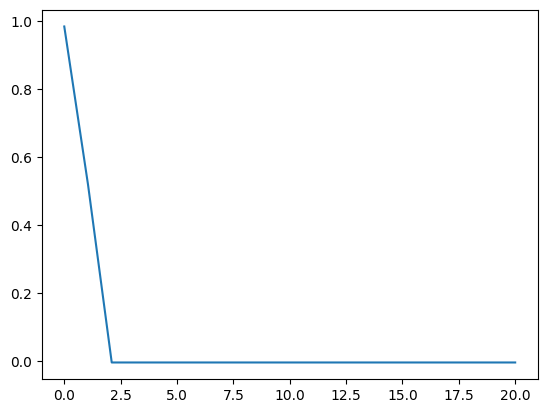

In [19]:
import numpy as np

alphas = np.linspace(0,20,20)

R2= []
for a in alphas:
    model_lasso = Lasso(alpha=a, max_iter=1000000)
    model_lasso.fit(X_train_scaled, y_train)
    y_pred_lasso = model_lasso.predict(X_test_scaled)
    R2.append(r2_score(y_test, y_pred_lasso))
    
import matplotlib.pyplot as plt

plt.plot(alphas, R2)
plt.show()